In [105]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [106]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


#### Define wrapper functions

In [107]:
def weight_variable(shape):
    """ Create TensorFlow weight with initial noise. """
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    """ Create TensorFlow bias with initial value of 0.1. """
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    """ 2D TensorFlow convolution with stride of 1 and zero padding. """
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    """ TensorFlow max pooling over 2x2 blocks. """
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                          padding='SAME')

def imshow(img, scale=None):

    # Assign default scale
    if not scale:
        scale = [np.min(img), np.max(img)]

    # Set up image plot
    plt.imshow(img, cmap='gray', vmin=scale[0], vmax=scale[1])
    plt.xticks([]), plt.yticks([])

    # Show
    plt.show()

#### Construct network

In [108]:
# Define variables
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 784])

In [109]:
## Layer 1 (Convolutional)

# Create weights
W_conv1 = weight_variable([5, 5, 1, 1])

# Reshape image
# -1 allows tf.reshape to infer that dimension
x_image = tf.reshape(x, [-1, 28, 28, 1])

# Convolve image
h_conv1 = conv2d(x_image, W_conv1)

In [110]:
## Readout layer

# Compute output
y_conv = tf.reshape(h_conv1, [-1, 784])

#### Train network

In [111]:
# Build training function
cross_entropy = tf.reduce_mean(tf.square(y_ - y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

# Build accuracy measure
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Create saver
saver = tf.train.Saver()

with tf.Session() as sess:

    # Initialize variables
    sess.run(tf.global_variables_initializer())

    # Iterate through 
    for i in range(20000):
        
        # Import next batch
        # batch = (data, labels)
        # data: 50 x 784, labels: 50 x 784
        batch = mnist.train.next_batch(50)
        noise_batch = batch[0] + 0.5*np.random.rand(*batch[0].shape)

        # Report iteration stats
        if i % 1000 == 0:
            train_accuracy = cross_entropy.eval(feed_dict={x: noise_batch,
                                                      y_: batch[0]})
            print('step {:5d}, current score {:g}'.format(
                i, train_accuracy))

        # Train network
        train_step.run(feed_dict={x: noise_batch, y_: batch[0]})

    # Save result
    saver.save(sess, "checkpoints/mnist_digits_denoise.ckpt")
    result_kernel = np.squeeze(np.array(W_conv1.eval()))

step     0, current score 0.0965327
step  1000, current score 0.041716
step  2000, current score 0.0288027
step  3000, current score 0.0254543
step  4000, current score 0.0238367
step  5000, current score 0.0240528
step  6000, current score 0.0244158
step  7000, current score 0.0227147
step  8000, current score 0.0235703
step  9000, current score 0.0226999
step 10000, current score 0.0236743
step 11000, current score 0.0248221
step 12000, current score 0.023135
step 13000, current score 0.0238586
step 14000, current score 0.0237676
step 15000, current score 0.0234607
step 16000, current score 0.0234187
step 17000, current score 0.0235196
step 18000, current score 0.0237018
step 19000, current score 0.0232255


#### Visualize Result

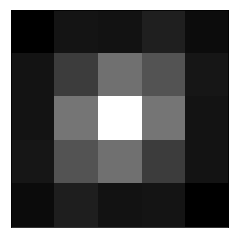

In [112]:
imshow(result_kernel)